# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JpJnKOpNUJHMvVY06_KTSPyLTQi5Pfi3A4z6nA9Tx3zx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelay-donotdelete-pr-7a9xmjjwm1jsx7'
object_key = 'flightdata.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [4]:
data.shape

(11231, 26)

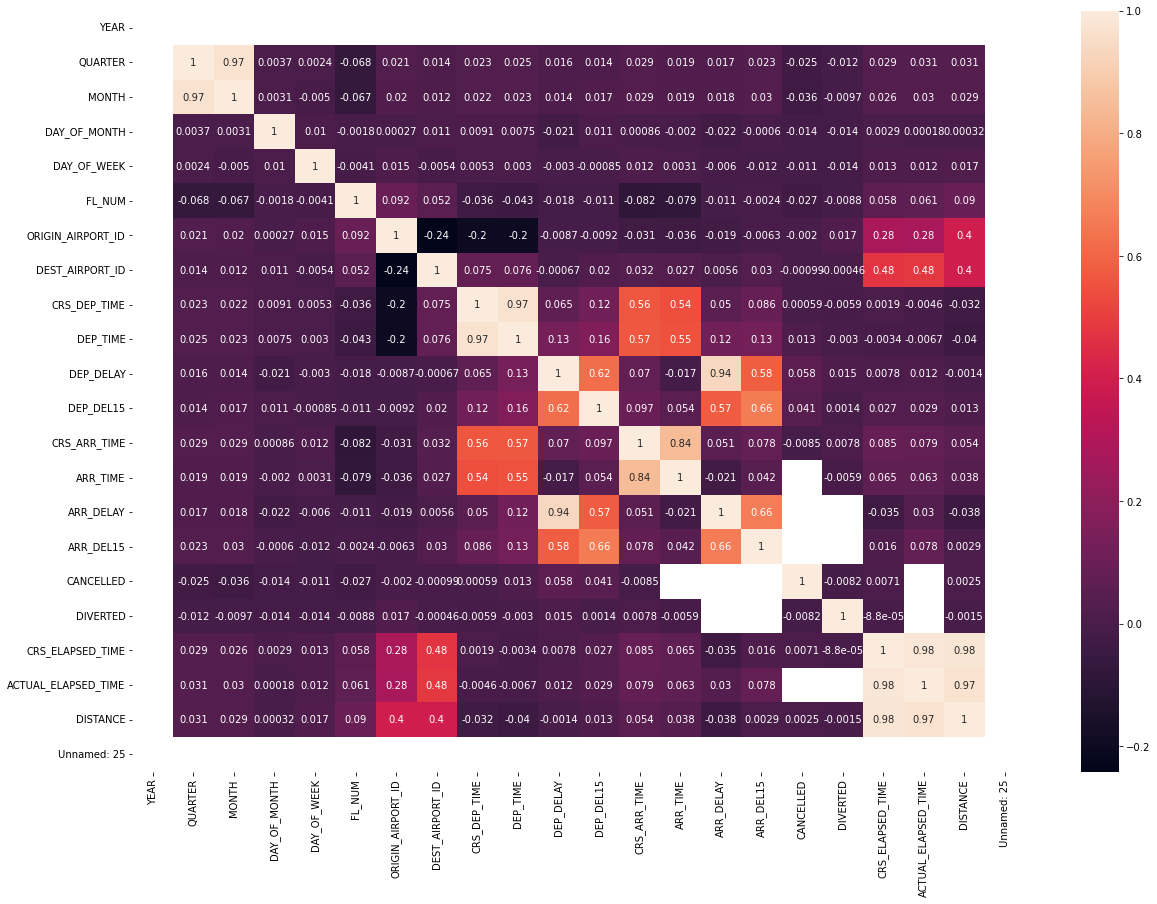

In [5]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(data.corr(),annot = True)
plt.show()

# Removing unwanted Columns

In [6]:
data1=data.drop(columns=["YEAR","ORIGIN_AIRPORT_ID","DEST_AIRPORT_ID"])


In [7]:
data1.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,1,1,1,5,DL,N836DN,1399,ATL,SEA,1905,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,1,1,1,5,DL,N964DN,1476,DTW,MSP,1345,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,1,1,1,5,DL,N813DN,1597,ATL,SEA,940,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,1,1,1,5,DL,N587NW,1768,SEA,MSP,819,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,1,1,1,5,DL,N836DN,1823,SEA,DTW,2300,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QUARTER              11231 non-null  int64  
 1   MONTH                11231 non-null  int64  
 2   DAY_OF_MONTH         11231 non-null  int64  
 3   DAY_OF_WEEK          11231 non-null  int64  
 4   UNIQUE_CARRIER       11231 non-null  object 
 5   TAIL_NUM             11231 non-null  object 
 6   FL_NUM               11231 non-null  int64  
 7   ORIGIN               11231 non-null  object 
 8   DEST                 11231 non-null  object 
 9   CRS_DEP_TIME         11231 non-null  int64  
 10  DEP_TIME             11124 non-null  float64
 11  DEP_DELAY            11124 non-null  float64
 12  DEP_DEL15            11124 non-null  float64
 13  CRS_ARR_TIME         11231 non-null  int64  
 14  ARR_TIME             11116 non-null  float64
 15  ARR_DELAY            11043 non-null 

# DATA CLEANING

In [9]:
data.isnull().values.any()


True

In [10]:
data.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [11]:
data1.iloc[179,:].isnull(),data1.iloc[179,:]


(QUARTER                False
 MONTH                  False
 DAY_OF_MONTH           False
 DAY_OF_WEEK            False
 UNIQUE_CARRIER         False
 TAIL_NUM               False
 FL_NUM                 False
 ORIGIN                 False
 DEST                   False
 CRS_DEP_TIME           False
 DEP_TIME                True
 DEP_DELAY               True
 DEP_DEL15               True
 CRS_ARR_TIME           False
 ARR_TIME                True
 ARR_DELAY               True
 ARR_DEL15               True
 CANCELLED              False
 DIVERTED               False
 CRS_ELAPSED_TIME       False
 ACTUAL_ELAPSED_TIME     True
 DISTANCE               False
 Unnamed: 25             True
 Name: 179, dtype: bool,
 QUARTER                     1
 MONTH                       1
 DAY_OF_MONTH               10
 DAY_OF_WEEK                 7
 UNIQUE_CARRIER             DL
 TAIL_NUM               N924DN
 FL_NUM                     86
 ORIGIN                    MSP
 DEST                      DTW
 CRS_D

In [12]:
data1[(data1["TAIL_NUM"]=="N924DN")&(data1["FL_NUM"]==86)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
179,1,1,10,7,DL,N924DN,86,MSP,DTW,1348,...,1632,NaN,NaN,NaN,1.0,0.0,104.0,NaN,528.0,NaN


In [13]:
data1[(data1["DEP_DEL15"]==0)&(data1["ARR_DEL15"]==1)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
34,1,1,4,1,DL,N827DN,1770,SEA,MSP,1520,...,2032,2048.0,16.0,1.0,0.0,0.0,192.0,207.0,1399.0,NaN
128,1,1,7,4,DL,N931DN,744,MSP,ATL,1005,...,1334,1349.0,15.0,1.0,0.0,0.0,149.0,159.0,907.0,NaN
146,1,1,8,5,DL,N678DL,8,MSP,ATL,1732,...,2105,2133.0,28.0,1.0,0.0,0.0,153.0,178.0,907.0,NaN
166,1,1,8,5,DL,N711ZX,1473,SEA,JFK,1110,...,1930,1950.0,20.0,1.0,0.0,0.0,320.0,340.0,2422.0,NaN
167,1,1,8,5,DL,N824DN,1598,SEA,ATL,620,...,1401,1416.0,15.0,1.0,0.0,0.0,281.0,296.0,2182.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11120,4,12,29,4,DL,N301DN,811,ATL,MSP,1350,...,1532,1552.0,20.0,1.0,0.0,0.0,162.0,185.0,907.0,NaN
11168,4,12,30,5,DL,N947DL,984,ATL,JFK,2055,...,2315,2330.0,15.0,1.0,0.0,0.0,140.0,157.0,760.0,NaN
11173,4,12,31,6,DL,N659DL,2610,ATL,MSP,725,...,900,921.0,21.0,1.0,0.0,0.0,155.0,168.0,907.0,NaN
11187,4,12,3,6,DL,N627DL,95,ATL,DTW,1235,...,1436,1500.0,24.0,1.0,0.0,0.0,121.0,131.0,594.0,NaN


In [14]:
data1.describe()


,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,11124.000000,11124.000000,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2.544475,6.628973,15.790758,3.960199,1334.325617,1320.798326,1327.189410,8.460266,0.142844,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,1.090701,3.354678,8.782056,1.995257,811.875227,490.737845,500.306462,36.762969,0.349930,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,1.000000,1.000000,1.000000,1.000000,7.000000,10.000000,1.000000,-16.000000,0.000000,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2.000000,4.000000,8.000000,2.000000,624.000000,905.000000,905.000000,-3.000000,0.000000,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,3.000000,7.000000,16.000000,4.000000,1267.000000,1320.000000,1324.000000,-1.000000,0.000000,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,3.000000,9.000000,23.000000,6.000000,2032.000000,1735.000000,1739.000000,4.000000,0.000000,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,4.000000,12.000000,31.000000,7.000000,2853.000000,2359.000000,2400.000000,645.000000,1.000000,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


# EDA/DATA ANALYSIS

<AxesSubplot:xlabel='DEP_DELAY', ylabel='ARR_DELAY'>

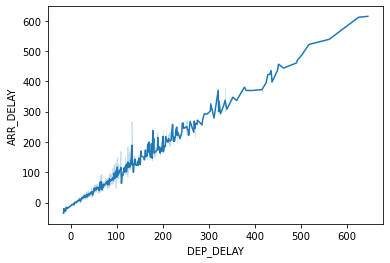

In [15]:
sns.lineplot(x="DEP_DELAY",y="ARR_DELAY",data=data1)

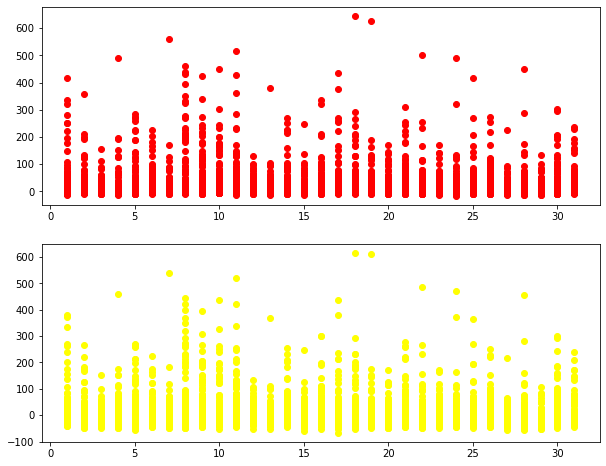

In [16]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.scatter(data1["DAY_OF_MONTH"],data1["DEP_DELAY"],color="red")
plt.subplot(2,1,2)
plt.scatter(data1["DAY_OF_MONTH"],data1["ARR_DELAY"],color="yellow")
plt.show()

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='DEP_DELAY'>

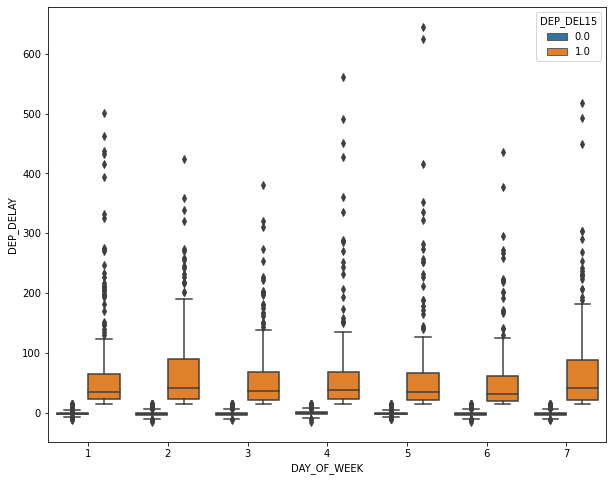

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(x="DAY_OF_WEEK",y="DEP_DELAY",data=data1,hue="DEP_DEL15")

In [18]:
data1.groupby(by="MONTH")["DEP_DEL15"].sum()

MONTH
1     113.0
2     115.0
3     104.0
4      96.0
5      86.0
6     168.0
7     219.0
8     246.0
9      88.0
10     86.0
11     66.0
12    202.0
Name: DEP_DEL15, dtype: float64

# Feature Extraction

In [19]:
ms=[6,7,8]
wt=[9,10,11]
sp=[12,1,2,3]
fl=[4,5]
data1["SEASON"]=np.where(data1["MONTH"].isin(ms),0,np.where(data1["MONTH"].isin(wt),1,np.where(data1["MONTH"].isin(sp),2,3)))

In [20]:
data1["SEASON"].value_counts()

2    3441
0    3184
1    2808
3    1798
Name: SEASON, dtype: int64

# Encoding Catagorical cloumns to numerical


In [21]:
data1["CANCELLED"]=np.where(data1["CANCELLED"]==1,4,0)

In [22]:
data1["DIVERTED"]=np.where(data1["DIVERTED"]==1,3,0)

In [23]:
data1.CANCELLED.unique(),data1.DIVERTED.unique()

(array([0, 4]), array([0, 3]))

In [24]:
data1["DELAY_15"]=data1["ARR_DEL15"]+data1["DEP_DEL15"]
data1.DELAY_15.unique()

array([ 0.,  1.,  2., nan])

In [25]:
data1["DELAY_15"].fillna(0,inplace=True)
data1.DELAY_15.unique()

array([0., 1., 2.])

In [26]:
data1["NDELAY"]=data1["DELAY_15"]+data1["CANCELLED"]+data1["DIVERTED"]

In [27]:
data1.NDELAY.unique()

array([0., 1., 2., 3., 4.])

In [28]:
len(data1["TAIL_NUM"].value_counts()),len(data1["FL_NUM"].value_counts())

(789, 690)

In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QUARTER              11231 non-null  int64  
 1   MONTH                11231 non-null  int64  
 2   DAY_OF_MONTH         11231 non-null  int64  
 3   DAY_OF_WEEK          11231 non-null  int64  
 4   UNIQUE_CARRIER       11231 non-null  object 
 5   TAIL_NUM             11231 non-null  object 
 6   FL_NUM               11231 non-null  int64  
 7   ORIGIN               11231 non-null  object 
 8   DEST                 11231 non-null  object 
 9   CRS_DEP_TIME         11231 non-null  int64  
 10  DEP_TIME             11124 non-null  float64
 11  DEP_DELAY            11124 non-null  float64
 12  DEP_DEL15            11124 non-null  float64
 13  CRS_ARR_TIME         11231 non-null  int64  
 14  ARR_TIME             11116 non-null  float64
 15  ARR_DELAY            11043 non-null 

In [30]:
clm=["UNIQUE_CARRIER","DEP_TIME","DEP_DELAY","DEP_DEL15","ARR_TIME","ARR_DELAY","ARR_DEL15","CANCELLED","DIVERTED",
    "ACTUAL_ELAPSED_TIME","DELAY_15"]
data2=data1.drop(columns=clm)
data2.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,Unnamed: 25,SEASON,NDELAY
0,1,1,1,5,N836DN,1399,ATL,SEA,1905,2143,338.0,2182.0,NaN,2,0.0
1,1,1,1,5,N964DN,1476,DTW,MSP,1345,1435,110.0,528.0,NaN,2,0.0
2,1,1,1,5,N813DN,1597,ATL,SEA,940,1215,335.0,2182.0,NaN,2,0.0
3,1,1,1,5,N587NW,1768,SEA,MSP,819,1335,196.0,1399.0,NaN,2,0.0
4,1,1,1,5,N836DN,1823,SEA,DTW,2300,607,247.0,1927.0,NaN,2,0.0


In [31]:
data3=data2.drop(columns=["TAIL_NUM","FL_NUM"])

In [32]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUARTER           11231 non-null  int64  
 1   MONTH             11231 non-null  int64  
 2   DAY_OF_MONTH      11231 non-null  int64  
 3   DAY_OF_WEEK       11231 non-null  int64  
 4   ORIGIN            11231 non-null  object 
 5   DEST              11231 non-null  object 
 6   CRS_DEP_TIME      11231 non-null  int64  
 7   CRS_ARR_TIME      11231 non-null  int64  
 8   CRS_ELAPSED_TIME  11231 non-null  float64
 9   DISTANCE          11231 non-null  float64
 10  Unnamed: 25       0 non-null      float64
 11  SEASON            11231 non-null  int64  
 12  NDELAY            11231 non-null  float64
dtypes: float64(4), int64(7), object(2)
memory usage: 1.1+ MB


array([[<AxesSubplot:title={'center':'QUARTER'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_MONTH'}>],
       [<AxesSubplot:title={'center':'DAY_OF_WEEK'}>,
        <AxesSubplot:title={'center':'CRS_DEP_TIME'}>,
        <AxesSubplot:title={'center':'CRS_ARR_TIME'}>],
       [<AxesSubplot:title={'center':'CRS_ELAPSED_TIME'}>,
        <AxesSubplot:title={'center':'DISTANCE'}>,
        <AxesSubplot:title={'center':'Unnamed: 25'}>],
       [<AxesSubplot:title={'center':'SEASON'}>,
        <AxesSubplot:title={'center':'NDELAY'}>, <AxesSubplot:>]],
      dtype=object)

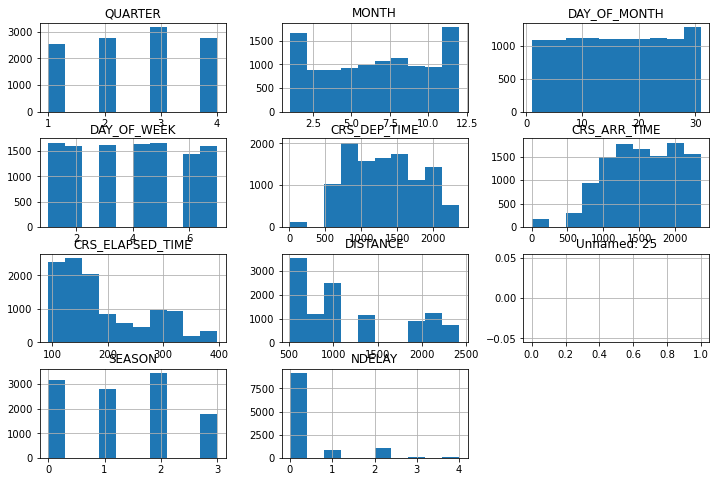

In [33]:
data3.hist(figsize=(12,8))

In [34]:
data3.NDELAY.value_counts()

0.0    9130
2.0    1035
1.0     878
4.0     114
3.0      74
Name: NDELAY, dtype: int64

# Splitting dependent and independent variables

In [35]:
x=data2.drop(columns=["NDELAY","TAIL_NUM"])
y=data2.NDELAY

# Encoding Categorical cloumns to numerical

In [36]:
x["ORIGIN"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)
x["DEST"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)

In [37]:
#pip install imblearn

In [38]:
#from imblearn.combine import SMOTETomek 
#smote=SMOTETomek(sampling_strategy={1:2000,2:2000,3:400,4:700},random_state=42)
#x1,y2=smote.fit_resample(x,y)
#y2.value_counts()

In [39]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JpJnKOpNUJHMvVY06_KTSPyLTQi5Pfi3A4z6nA9Tx3zx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelay-donotdelete-pr-7a9xmjjwm1jsx7'
object_key = 'x.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

x1 = pd.read_csv(body)


In [40]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JpJnKOpNUJHMvVY06_KTSPyLTQi5Pfi3A4z6nA9Tx3zx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelay-donotdelete-pr-7a9xmjjwm1jsx7'
object_key = 'y.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

y2= pd.read_csv(body)


In [41]:
from sklearn.utils import shuffle
X,Y=shuffle(x1,y2,random_state=72)
X.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,SEASON
5816,3,8,16,2,786,2,1,1400,1603,123,594,0
475,1,1,25,1,1173,4,2,830,1114,104,528,2
10952,2,6,25,2,2547,5,4,1894,16,197,1399,0
8363,4,11,14,1,1247,5,1,900,1653,293,2182,1
11452,1,2,19,2,1232,1,4,2079,2209,149,744,2


# Split train test data 

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y2,test_size=0.2,random_state=42)

In [43]:
x_train.shape,x_test.shape

((9856, 12), (2464, 12))

In [44]:
x_train.keys()

Index(['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_NUM', 'ORIGIN',
       'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'SEASON'],
      dtype='object')

# Model building

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_test,y_test)

0.7491883116883117

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

/tmp/wsuser/ipykernel_213/905497165.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.8368506493506493

In [47]:
pd.DataFrame(rf.predict(x_test)).value_counts()

0.0    1881
1.0     223
2.0     213
4.0     106
3.0      41
dtype: int64

In [48]:
x_test.iloc[[99,88,22],:]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,SEASON
8817,4,11,3,4,2787,4,1,1935,2308,153,907,1
8430,4,11,21,1,42,1,3,1540,1759,139,760,1
2894,2,4,1,5,1991,4,1,520,845,145,907,3


In [49]:
y_test.iloc[[8,21,910]]

,NDELAY
2318,0.0
12270,4.0
7414,0.0


In [50]:
rf.predict(x_test.iloc[[8,21,910],:])

array([0., 4., 0.])

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(solver='sag')
lr1.fit(x_train,y_train)
lr1.score(x_test,y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6830357142857143

# SVM

In [52]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6128246753246753

In [53]:
pd.DataFrame(svm.predict(x_test)).value_counts()

0.0    2167
2.0     230
4.0      67
dtype: int64

In [54]:
pd.DataFrame(y_test).value_counts()

NDELAY
0.0       1683
1.0        308
2.0        288
4.0        130
3.0         55
dtype: int64

# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.729301948051948

Evaluating Decision Tree and Random Forest

# Evaluation of Random Forest

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
pred=rf.predict(x_test)
cm=confusion_matrix(y_test, pred)
#plt.figure(figsize=(10,6))
#sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
#print('Testing Accuracy for knn',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, pred))

Testing Sensitivity for Random Forest 0.9360230547550432
Testing Specificity for Random Forest 0.8716577540106952
Testing Precision for Random Forest 0.9854368932038835
Testing accuracy for Random Forest 0.8368506493506493


In [57]:
print(classification_report(y_test,pred))#RandomForest

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1683
         1.0       0.73      0.53      0.61       308
         2.0       0.67      0.49      0.57       288
         3.0       0.88      0.65      0.75        55
         4.0       0.92      0.75      0.82       130

    accuracy                           0.84      2464
   macro avg       0.81      0.68      0.73      2464
weighted avg       0.83      0.84      0.83      2464



# Evaluation Of Decission Tree

In [58]:
pred1=dc.predict(x_test)
cm1=confusion_matrix(y_test, pred1)
#plt.figure(figsize=(10,6))
#sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Decision Tree',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree',(TN/(TN+FP)))
print('Testing Precision for Decision Tree',(TP/(TP+FP)))
print('Testing accuracy for Decision Tree',accuracy_score(y_test, pred1))

Testing Accuracy for Decision Tree 0.8855218855218855
Testing Sensitivity for Decision Tree 0.939894319682959
Testing Specificity for Decision Tree 0.5783582089552238
Testing Precision for Decision Tree 0.9264322916666666
Testing accuracy for Decision Tree 0.7491883116883117


In [59]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1683
         1.0       0.48      0.50      0.49       308
         2.0       0.44      0.51      0.47       288
         3.0       0.48      0.51      0.50        55
         4.0       0.79      0.72      0.75       130

    accuracy                           0.75      2464
   macro avg       0.61      0.62      0.61      2464
weighted avg       0.76      0.75      0.75      2464



In [60]:
import pickle
pickle.dump(rf,open("rfmodel.pkl",'wb'))

In [61]:
#x_train[0]

In [62]:
!pip install ibm_watson_machine_learning


In [63]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"FDu8w9acEuLpZiojHlEoW5Rc2uHT9889GjnPT5QZ0-LN"
}
client=APIClient(wml_credentials)

In [64]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
7b243b6d-ba5f-4c72-a448-d3264bedefb0  Models  2022-11-16T18:11:38.832Z
------------------------------------  ------  ------------------------


In [65]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources']if item['entity']["name"]==space_name)['metadata']['id'])

In [66]:
space_uid=guid_from_space_name(client,'Models')
print ("SPACE UID= "+ space_uid)

SPACE UID= 7b243b6d-ba5f-4c72-a448-d3264bedefb0


In [67]:
client.set.default_space(space_uid)

'SUCCESS'

In [68]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [69]:
import sklearn
sklearn. __version__
!pip install scikit-learn==1.0
'The scikit-learn version is {}.'.format(sklearn.__version__)

'The scikit-learn version is 1.0.'

In [70]:
Model_name="randomforest"
Deployment_name="rf_deployment"
Demo_model=rf

In [71]:
soft_spec_id=client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [72]:
model_props={
    client.repository.ModelMetaNames.NAME:Model_name,
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:soft_spec_id
}

In [73]:
model_details=client.repository.store_model(model=Demo_model,meta_props=model_props,training_data=x_train,training_target=y_train.values.ravel())

In [74]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'QUARTER', 'type': 'int64'},
      {'name': 'MONTH', 'type': 'int64'},
      {'name': 'DAY_OF_MONTH', 'type': 'int64'},
      {'name': 'DAY_OF_WEEK', 'type': 'int64'},
      {'name': 'FL_NUM', 'type': 'int64'},
      {'name': 'ORIGIN', 'type': 'int64'},
      {'name': 'DEST', 'type': 'int64'},
      {'name': 'CRS_DEP_TIME', 'type': 'int64'},
      {'name': 'CRS_ARR_TIME', 'type': 'int64'},
      {'name': 'CRS_ELAPSED_TIME', 'type': 'int64'},
      {'name': 'DISTANCE', 'type': 'int64'},
      {'name': 'SEASON', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-16T21:29:23.046Z',
  'id': '83d7fa92-a560-4aa9-82ae-3466a8824a31',
  'modified_at': '2022-11-16T21:29:32.913Z',
  'name

In [75]:
model_id=client.repository.get_model_id(model_details)

In [76]:
model_id

'83d7fa92-a560-4aa9-82ae-3466a8824a31'

In [77]:
dep_props={
    client.deployments.ConfigurationMetaNames.NAME:Deployment_name,
    client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [ ]:
deployment=client.deployments.create(artifact_uid=model_id,meta_props=dep_props)



#######################################################################################

Synchronous deployment creation for uid: '83d7fa92-a560-4aa9-82ae-3466a8824a31' started

#######################################################################################


initializing